In [2]:
%%html
<style>
table {float:left}
</style>

### Prediction Task - Part A

For our predictions, we started exploring the data and applying traditional machine learning techniques such as linear regression, SVM, Random Forest, XGBoost, etc. We soon found out that our traditional approaches did not take into account the aspect time. Therefore, we got inspired by the medium article https://bit.ly/2VF0IXm. They proposed to fuse the sensor data into one signal (the so called health indicator) that would help us to make RUL predictions.

Exploration results
First off, we applied a distribution plot and correlation matrix between the sensors. Secondly, we identified that some sensors showed clear signs of a pattern when being close to their end of life (see Figure XXX). Based on those results, we removed the sensors that were stagnate, were 100% correlated and showed no signs of a pattern.

Figure XXX: XXX

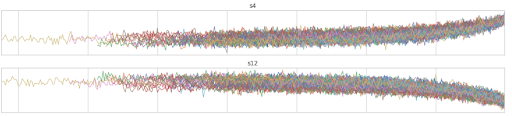


__Model__

We now will explain our model and the steps we applied. First off, we loaded the DataTrain.txt and DataSchedule.txt and selected the (6) remaining columns. We then calculated the slopes of the sensors using a linear model (X = sensors, y = RUL). Then we applied PCA to reduce the dimensionalities from 6 to 3. After that, we used the first three PCAs to train a linear model to predict the health indicator (HI). Lastly, we fitted an exponential model on the HI.

__Predictions__

To make predictions, we again extracted the (6) remaining columns, fit the PCA on those columns, and predict the health indicator. We use the health indicator to find the lowest Sum Squared Differences for each engine id. To do so, we compare the exponential HI values (from the DataTrain) with the predicted HI (from DataSchedule). Where the loss is the lowest, we extract the RUL. 

Afterwards, we collected for each engine id their lowest loss and predicted RUL. We take the 5 lowests losses and calculate a weighted prediction (where the lowest losses have a higher weight).


--------------------------

### Prediction Task - Part B <a id='Prediction-Task-Part-B'></a>

##### *miss hier nog iets toevoegen hoe onze predictions vergelijken met die van de consultants?
##### korte tabel of wat summary stats ofzo?

-----------------------

### Optimization Task 1 - Part A <a id='Task-1-Part-A'></a>

The goal is to develop a maintenance schedule for the engines in dataset 2 using RUL predictions made by a consultant company as well as our own. In optimization task 1 company X is going to allocate teams to different engines in order to perform maintenance.  We can assume, that we are currently at day t = 1 and company X wants to allocate teams to engines in order to minimize penalty costs for a planning horizon $T$. 

#### Parameters
Based on the given task, we define the following parameters: 
- The set of engines that needs maintenance is $M = {1,2,...j}$
- The planning horizon is $T = {1,2,...,t}$
- The available working teams are $G = {1,2,..g}$
- The Remaing Useful Time (RUL) for each engine is $RUL_j$ 
- The number of required working days of team $g$ on engine $j$ is $\mu_{g,j}$
- The daily penalty cost of a engine $j$ is $c_j$ 
- Let $s_{g,j,t}$ be the saving of costs if team $g$ starts working on engine $j$ from day $t$

#### Decision Variables

\begin{equation}
  X_{g,j,t} = \left \{
  \begin{aligned}
    &1, && \text{if team g starts working on engine j at day t}\  \\
    &0, && \text{otherwise}
  \end{aligned} \right.
\end{equation} 

#### Objective Function
The goal is to minimize the penalty costs for a planning horizon $T$. Within the planning horizon we can distinguish between one of two scenarios for each engine: 
1. engine $j$ _is_ maintained starting from day $t$ by team $g$: costs for this engine are $P_{g,j,t}$ = $\sum_{RUL_j+1}^{t+\mu_{g,j}-1} c_j$

2. engine $j$ _is not_ maintained: costs for engine $j$ are $Q_j = \sum_{RUL_j+1}^T c_j$

From $P_{g,j,t}$ and $Q_j$ we can calculate the potential savings ($s_{g,j,t}$) when team $g$ starts work on engine $j$ on day $t$ with the following operation: $Q_j$ - $P_{g,j,t}$.

Minimizing the cost will give us the following function: 

$Min$ $Y = \sum_{j=1}^{M} Q_j - \sum_{j=1}^{M} \sum_{g=1}^{G} \sum_{t=1}^{T} s_{g,j,t}* X_{g,j,t}$

The total costs ($\sum_{j=1}^{M} Q_j$) given no maintance, will be the same regardless the decision variables. Therefore we can transform this problem from minimizing the cost to maximizing the total savings, which gives us the following objective function:

$Max$  $Z = \sum_{j=1}^{M} \sum_{g=1}^{G} \sum_{t=1}^{T} s_{g,j,t}* X_{g,j,t} $

#### Constraints
##### Constraint 1
The maintenance of engine $j$ can be performed at most once during the planning period. 
 
$\sum_{g=1}^{G} \sum_{t=1}^{T} X_{g,j,t}\leq 1$ for all $j \in M$


##### Constraint 2
The maintenance must be completed within the planning period. Therefore we have to make sure the maintenance for all engines that are maintained is finished on day $T$ at the latest.

$\sum_{g=1}^{G} \sum_{t=1}^{T} X_{g,j,t} * (t + \mu_{g,j} -1) \leq T$ for all $j \in M$

##### Constraint 3
Teams can only start working on one engine a day.

$\sum_{j=1}^{M} X_{g,j,t} \leq 1$ for all $t \in T$,$g \in G$

##### Constraint 4 
Teams are not allowed to work on multiple engines simultaneously. Constraint 3 already makes sure that a team does not start two engines on the same day. Additionally, we make sure a team does not start working on any other engines while working on engine $j$.

$\lVert M\rVert * X_{g,j_a,t_a} + \sum_{j=1}^{M} \sum_{t=t_a+1}^{min \{ T,t + \mu_{g,j_a} -1\}} X_{g,j,t} \leq \lVert M\rVert$ for all $g \in G, t_a \in T, j_a \in M$

### Optimization Task 1 - Part B <a id='Task-1-Part-B'></a>

For this optimization task we are assuming a time horizon $T = 20$. Furthermore, the decision variables, objective function, constraints and parameters have been defined in the previous section ([Optimization Task 1 - Part A](#Task-1-Part-A)). 

Solving this optimization problem with the RUL predictions from the [Prediction Task - Part B](#Prediction-Task-Part-B) gave the following results.

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       34 |      1 | A           |           1 |         6 |               0 |
|       68 |      1 | A           |           7 |         9 |               0 |
|       82 |      1 | A           |          10 |        14 |               0 |
|       66 |      1 | A           |          15 |        17 |               0 |
|       76 |      2 | A           |           1 |         5 |               0 |
|       35 |      2 | A           |           6 |        11 |               0 |
|       36 |      2 | A           |          12 |        17 |               0 |
|       81 |      3 | B           |           1 |         6 |               0 |
|       42 |      3 | B           |           9 |        16 |               0 |
|       31 |      4 | B           |           1 |         7 |               0 |
|       20 |      4 | B           |           9 |        13 |               0 |

_Total penalty costs:_ 0

__Discussion__:

Given a planning horizon $T = 20$, we see that in our maintenance schedule all the engines with a RUL $\leq 20$ are maintained within the horizon. On top of this, none of the engines incurred any penalty costs. As result the penalty costs associated with the entire schedule is zero. Hence, we can be certain that we have found the optimal solution, which was also confirmed by the PulP solver.

---------------------------------------------

### Optimization Task 1 - Part C <a id='Task-1-Part-C'></a>

For this optimization task we are again assuming a time horizon $T = 20$. Moreover, the decision variables, objective function, constraints and parameters remain unchanged (see: [Optimization Task 1 - Part A](#Task-1-Part-A)). 

However, for this optimization problem we will be using the predictions of the consultancy company. Below we display and discuss the results.

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       34 |      1 | A           |           1 |         6 |               0 |
|       42 |      1 | A           |           7 |        12 |               0 |
|       82 |      1 | A           |          13 |        17 |              18 |
|       35 |      2 | A           |           1 |         6 |               0 |
|       20 |      2 | A           |           7 |        10 |               0 |
|       68 |      2 | A           |          11 |        13 |               0 |
|       56 |      2 | A           |          16 |        18 |               0 |
|       76 |      3 | B           |           1 |         6 |              15 |
|       49 |      3 | B           |           7 |        14 |               0 |
|       81 |      4 | B           |           1 |         6 |               0 |
|       31 |      4 | B           |           7 |        13 |               0 |
|       66 |      4 | B           |          14 |        18 |               0 |

_Total penalty cost:_ 33

__Discussion:__

Similar to the maintenance schedule from [Optimization Task 1 - Part B](#Task-1-Part-B) we see that all the engines are assigned to a team and maintained within the planning horizon $T = 20$. Despite maintaining all the engines with a RUL $\leq 20$, there are penalty costs incurred for engine $82$ and $76$. Overall, in this scenario (using the consultancy company's predictions) the total penalty costs of the maintenance schedule is 33, whereas our own predictions gave 0 penalty costs.

These different results can be explained by the predicted RUL for the engines. First of all, for our predictions there are only 11 engines that have a RUL $\leq 20$ whereas the consultancy predictions contains 12 engines with a RUL $\leq 20$. Hence, the scheduling problem using the consultancy predictions is already more difficult as the teams are supposed to maintain more engines within the same planning horizon.

Futhermore, for the engines that were included in the planning horizon $T = 20$, the RUL predictions by the consultany company are smaller than our RUL predictions. Again, this makes the problem scheduling problem more difficult using the consultancy company's predictions as teams have less time to avoid penalty costs for engines.

Despite being a more difficult optimization problem by using the consultancy company's predictions, PuLP still found an optimial solution.

------------------------

### Optimization Task 2 - Part A <a id='Task-2-Part-A'></a>

For this optimization task we extend the formulation of the optimization problem defined earlier (see: [Optimization Task 1 - Part A](#Task-1-Part-A)).

We add an additional constraint that limits the number of engines a team is allowed to work on during the planning horizon. To include this constraint in our problem formulation we define a new parameter $k_{h}^g$ that holds how many engines team $g$ is allowed to work on during a planning horizon of lenght $h$. This constraint is referred to as the _max-engine constraint_ can be formulated as follows:

$\sum_{j=1}^{M} \sum_{t=1}^{T} X_{g,j,t} \leq k_h^g $ for all  $g \in G$

-------------------

### Optimization Task 2 - Part B <a id='Task-2-Part-B'></a>

For this optimization task we are assuming a time horizon $T = 20$ and using the RUL predictions from [Prediction Task - Part B](#Prediction-Task-Part-B). In addition to the constraints used for [Optimization Task 1](#Task-1-Part-A), we also include the _max-engine constraint_ as defined in [Optimization Task 2 - Part A](#Task-2-Part-A). Furthermore, we assume the following values for $k_h^g$: $k_{20}^A = 2$ and $ k_{20}^B = 2$. This gave the following results:

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       68 |      1 | A           |           2 |         4 |               0 |
|       31 |      1 | A           |           5 |        10 |               0 |
|       81 |      2 | A           |           1 |         5 |               0 |
|       35 |      2 | A           |           6 |        11 |               0 |
|       76 |      3 | B           |           1 |         6 |               0 |
|       20 |      3 | B           |          11 |        15 |               0 |
|       34 |      4 | B           |           1 |         8 |               0 |
|       42 |      4 | B           |           9 |        16 |               0 |
|       36 |      - |    -        |           - |         - |              14 |
|       66 |      - |    -        |           - |         - |              15 |
|       82 |      - |    -        |           - |         - |               9 |

_Total penalty costs:_ 38

__Discussion:__

With the additional _max-engine constraint_ we see that we are no longer able to maintain all the engines with a RUL $\leq 20$ within the planning horizon $T = 20$. The teams are unable to work on engines $36$, $66$, and $82$ within the planning horizon. While none of the other engines incurred any penalty costs, these three engines led to a total penalty cost of 38 for this maintenance schedule. 

These results are easily explainable compared to [Optimization Task 1 Part - B](#Task-1-Part-B) considering the additional _max-engine constraint_. Due to the additional constraint both teams of type $A$ and $B$ are only allowed to work on at most two engines within a planning horizon. Given a total of 4 teams, we know that at most 8 engines can be maintained regardless the length of the planning horizon. The planning horizon $T = 20$ includes 11 engines with a RUL $\leq 20$, thus we would expect 3 engines to be unmaintained as is the case.  

Furthermore, out of the 11 engines that teams could work on, engines $36$, $66$, and $82$ have the lowest penalty costs if they go completely unmaintained. Because none of the other engines incur any penalty costs, we know that we have found the optimal solution given the _max-engine constraint_.

----------------



### Optimization Task 2 - Part C <a id='Task-2-Part-C'></a>

For this optimization task we are assuming a time horizon $T = 20$ and using the RUL predictions of the consultancy company. In addition to the constraints used for [Optimization Task 1](#Task-1-Part-A), we also include the _max-engine constraint_ as defined in [Optimization Task 2 - Part A](#Task-2-Part-A). Furthermore, we assume the following values for $k_h^g$: $k_{20}^A = 2$ and $ k_{20}^B = 2$. This gives the following results:

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       34 |      1 | A           |           1 |         6 |               0 |
|       20 |      1 | A           |           7 |        10 |               0 |
|       35 |      2 | A           |           2 |         7 |               0 |
|       42 |      2 | A           |           8 |        13 |               0 |
|       81 |      3 | B           |           1 |         6 |               0 |
|       31 |      3 | B           |           8 |        14 |               0 |
|       76 |      4 | B           |           1 |         6 |              15 |
|       49 |      4 | B           |           7 |        14 |               0 |
|       56 |      - | -           |           - |         - |              18 |
|       66 |      - | -           |           - |         - |              10 |
|       68 |      - | -           |           - |         - |              35 |
|       82 |      - | -           |           - |         - |              27 |

_Total penalty costs:_ 105

__Discussion:__

Again, the _max-engine constraint_ has the same effect as seen in [Optimization Task 2 - Part B](#Task-2-Part-B). Both teams of type $A$ and type $B$ can only work on at most 2 engines within a planning horizon. Given a total of 4 teams, at most 8 engines can be maintained regardless of the lenght of the planning horizon. Since there are 12 engines with a RUL $\leq 20$ in the consultany company's predictions, we know that at least 4 engines will be unmaintained. The results show that engines $56$, $66$, $68$, and $82$ have not been assigned to any team. On top of that, there is one engine (engine $76$) that incurs costs for being partly unmaintained at some point in throughout the planning horizon. Collectively these penalty costs total to 105 for the entire maintenance schedule.

Comparing these results to the results from [Optimization Task 2 - Part B](#Task-2-Part-B), they are relatively similar. Out of the 8 engines that are maintained in both scenarios, 7 engines are overlapping: $34, 20, 35, 42, 81, 31, 76$. There are also similarities with regards to the order that engines are maintained between the schedules. For example, both schedules start work on engines $81, 34$ and $76$ on the first day.

The most notable differences between the schedules relates to the predicted RUL values. For example, engine $82$ is unmaintained in both maintenance schedules. However, our predicted RUL for engine $82$ is 17, whereas the consultancy company predicts a RUL of 11 for engine $82$. As a result engine $82$ only contributes a penalty cost of 9 to the overall costs in [Optimization Task 2 - Part B](#Task-2-Part-B), whereas it contributes a penalty cost of 27 when using the consultancy company's predictions. Given smaller RUL predictions and more engines within the same planning horizon, it is to be expected that the penalty costs are higher in comparison to [Optimization Task 2 - Part B](#Task-2-Part-B).

Similar to all the previous optimization tasks so far, the PuLP solver did find the optimal solution.

 -------------

### Optimization Task 2 - Part D

For this optimization task we are repeating the scenario from [Optimization Task 2 - Part C](#Task-2-Part-C) except that the planning horizion now will be $T = 25$ rather than $T = 20$.

We assume $k_{h}^g$: $k_{25}^A = 2$ and $ k_{25}^B = 2$

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       76 |      1 | A           |           1 |         5 |              10 |
|       49 |      1 | A           |           7 |        12 |               0 |
|       34 |      2 | A           |           1 |         6 |               0 |
|       42 |      2 | A           |           7 |        12 |               0 |
|       20 |      3 | B           |           3 |         7 |               0 |
|       31 |      3 | B           |           8 |        14 |               0 |
|       35 |      4 | B           |           1 |         8 |               0 |
|       56 |      4 | B           |          10 |        14 |               0 |
|       36 |      - |             |           - |         - |               7 |
|       37 |      - |             |           - |         - |              28 |
|       41 |      - |             |           - |         - |              18 |
|       61 |      - |             |           - |         - |              10 |
|       64 |      - |             |           - |         - |               5 |
|       66 |      - |             |           - |         - |              35 |
|       68 |      - |             |           - |         - |              60 |
|       81 |      - |             |           - |         - |              57 |
|       82 |      - |             |           - |         - |              42 |
|       92 |      - |             |           - |         - |               3 |
|      100 |      - |             |           - |         - |               3 |

_Total penalty costs:_ 278

__Discussion:__

Similar to [Optimization Task 2 - Part B](#Task-2-Part-B) and [Optimization Task 2 - Part C](#Task-2-Part-C), the _max-engine constraint_ limits that at most 8 engines can be maintained throughout the planning horizon. It not surpising to see that the total penalty costs in this scenario are much higher in comparison to [Optimization Task 2 - Part C](#Task-2-Part-C). While the teams are still able to only work on 8 engines, the additional 5 days in the planning horizon means another 7 engines are included in the maintenance schedule. Clearly this negatively impacts the total penalty costs.

As far as the engines that are maintained, both scenarios assign teams to maintain the following engines: $76, 34, 35, 20, 49, 42, 31$. Engine $56$ was not assigned in the maintenance schedule for [Optimization Task 2 - Part C](#Task-2-Part-C), but is assigned to a team when the planning horizon is extended to 25 days. While engine $56$ has the highest possible penalty cost per day ($9$), since its RUL is 18 in [Optimization Task 2 - Part C](#Task-2-Part-C) it would only incur penalty costs for two days, which was a more optimal decision than having another engine unmaintained for a longer time. However, in the current scenario there are an additional 5 days were engine $56$ would be unmaintained and thus quickly adding to the total cost given the high penalty costs per day. Hence, it makes sense that engine $56$ now is included in the maintenance schedule whereas it was not included in [Optimization Task 2 - Part C](#Task-2-Part-C). 

Again, the PuLP solver also found the optimal solution for this optimization problem.

-------------------------

### Optimization Task 3 - Part A <a id='Task-3-Part-A'></a>

For this task, we extend the formulations of the two optimization problems defined earlier (see: [Optimization Task 1 - Part A](#Task-1-Part-A) and [Optimization Task 2 - Part A](#Task-2-Part-A)). 

The final constraint takes into account working conditions of the teams and the location of the engines. More specifically, every engine $j \in \mathscr{M}$ is located is a region $L_j \in \mathscr{L}$ and every team can only be assigned to jobs in a particular region. According to the *regional constraints*, a team $g \in \mathscr{G}$ can only work on an engine that is which is located in region $R_g \in \mathscr{L}$.

To include this constraint in our problem formulation we define two parameters $L_j$ and $R_g$ that hold the regions of engine $j$ and team $g$ respectively.

Given this definition, the _regional constraints_ can be formulated as follows:

$\sum_{t=1}^{T} X_{g,j,t} * L_j = \sum_{t=1}^{T} X_{g,j,t} * R_g $ for all  $g \in G, j \in M$

-------------------

### Optimization Task 3 - Part B <a id='Task-3-Part-B'></a>

For this optimization task we are assuming a time horizon $T = 20$ and using the RUL predictions from [Prediction Task - Part B](#Prediction-Task-Part-B). In addition to the constraints used for [Optimization Task 1](#Task-1-Part-A) and [Optimization Task 2](#Task-2-Part-A), we include the _regional constraints_ as defined in [Optimization Task 3 - Part A](#Task-3-Part-A). Furthermore, we assume the following values for $L_j, j \in \mathscr{M}$: $L_j=1, j\in \{1,2,...,33\}$, and $L_j=2, j \in \{34, 35,...,100\}$ and the following values for $R_g, g \in \mathscr{G}$: $R_g=1, g \in \{1, 3\}$ and $R_g=2, g \in \{2, 4\}$ This gives the following results:

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       31 |      1 | A           |           1 |         6 |               0 |
|       20 |      1 | A           |          10 |        13 |               0 |
|       34 |      2 | A           |           1 |         6 |               0 |
|       68 |      2 | A           |           7 |         9 |               0 |
|       76 |      4 | B           |           1 |         6 |               0 |
|       35 |      4 | B           |           7 |        14 |               0 |
|       36 |    -   |             |         -   |       -   |              14 |
|       42 |    -   |             |         -   |       -   |              36 |
|       66 |    -   |             |         -   |       -   |              15 |
|       81 |    -   |             |         -   |       -   |              42 |
|       82 |    -   |             |         -   |       -   |               9 |

_Total penalty costs:_ 116

__Discussion:__

The _regional constraints_ pose additional total costs to the optimal schedule. These costs can be explained through the fact that only two engines with a RUL $\leq 20$ are located in region 1, namely $L_{20} = 1$ and $L_{31} = 1$. Also, two teams are located in region 1: $R_1 = 1$ and $R_3 = 1$. As team 1 already maintains engines 20 and 31, team 3 cannot maintain any engines in the schedule. 

Hence, compared to [Optimization Task 2 - Part B](#Task-2-Part-B), engine 42 and 82 will not be planned for maintenance anymore, increasing the total penalty costs with $36 + 42 = 78$.

-------------------

### Optimization Task 3 - Part C <a id='Task-3-Part-C'></a>

For this optimization task we are assuming a time horizon  𝑇=20 and using the RUL predictions from the consultancy company. In addition to the constraints used for [Optimization Task 1](#Task-1-Part-A) and [Optimization Task 2](#Task-2-Part-A), we also include the _regional constraints_ as defined in [Optimization Task 3 - Part A](#Task-3-Part-A). Values for $L_j$ and $R_g$ are the same as in [Optimization Task 3 - Part B](#Task-3-Part-B). This gives the following results:

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       31 |      1 | A           |           1 |         6 |               0 |
|       34 |      2 | A           |           1 |         6 |               0 |
|       42 |      2 | A           |           7 |        12 |               0 |
|       20 |      3 | B           |           3 |         7 |               0 |
|       76 |      4 | B           |           1 |         6 |              15 |
|       49 |      4 | B           |           7 |        14 |               0 |
|       35 |    -   |             |         -   |       -   |              84 |
|       56 |    -   |             |         -   |       -   |              18 |
|       66 |    -   |             |         -   |       -   |              10 |
|       68 |    -   |             |         -   |       -   |              35 |
|       81 |    -   |             |         -   |       -   |              42 |
|       82 |    -   |             |         -   |       -   |              27 |

_Total penalty costs:_ 231

__Discussion:__

Again, the _regional constraints_ pose additional total costs to the optimal schedule through the fact that only two engines with a RUL $\leq 20$ and both team 1 and 3 are located in region 1. This time however, both teams 1 and 3 work on one of two engines 31 and 20 respectively. 

Hence, compared to [Optimization Task 2 - Part C](#Task-2-Part-C), engines 35 and 88 will not be planned for maintenance anymore, increasing the total penalty costs with $84 + 42 = 126$.

-------------------

### Optimization Task 3 - Part D <a id='Task-3-Part-D'></a>

For this optimization task we are repeating the scenario from [Optimization Task 3 - Part C](#Task-3-Part-C) except that the planning horizion now will be $T = 25$ rather than $T = 20$.

Again, values for $L_j$ and $R_g$ are the same as in [Optimization Task 3 - Part B](#Task-3-Part-B) and [Optimization Task 3 - Part C](#Task-3-Part-C). This gives the following results:

_Maintenance schedule:_

|   engine |   team | team_type   |   start_day |   end_day |   penalty_costs |
|---------:|-------:|:------------|------------:|----------:|----------------:|
|       20 |      1 | A           |           3 |         6 |               0 |
|       34 |      2 | A           |           1 |         6 |               0 |
|       42 |      2 | A           |           8 |        13 |               0 |
|       31 |      3 | B           |           6 |        12 |               0 |
|       35 |      4 | B           |           1 |         8 |               0 |
|       49 |      4 | B           |           9 |        16 |              18 |
|       36 |    -   |             |         -   |       -   |               7 |
|       37 |    -   |             |         -   |       -   |              28 |
|       41 |    -   |             |         -   |       -   |              18 |
|       56 |    -   |             |         -   |       -   |              63 |
|       61 |    -   |             |         -   |       -   |              10 |
|       64 |    -   |             |         -   |       -   |               5 |
|       66 |    -   |             |         -   |       -   |              35 |
|       68 |    -   |             |         -   |       -   |              60 |
|       76 |    -   |             |         -   |       -   |             110 |
|       81 |    -   |             |         -   |       -   |              57 |
|       82 |    -   |             |         -   |       -   |              42 |
|       92 |    -   |             |         -   |       -   |               3 |
|      100 |    -   |             |         -   |       -   |               3 |

_Total penalty costs:_ 459

Due to the increase in time horizon T, it not surpising to see that the total penalty costs in this scenario are much higher in comparison to [Optimization Task 3 - Part C](#Task-3-Part-C). Furthermore, again, the _regional constraints_ limit the maintenance performance of teams 1 and 3 to only engines 20 and 31, which contributes to the substantial increase in total penalty costs compared to [Optimization Task 2 - Part D](#Task-3-Part-D).

Moreover, when we compare the results of the current optimization task to the results of [Optimization Task 3 - Part C](#Task-3-Part-C), we notice a difference in engine assignment. In [Optimization Task 3 - Part C](#Task-3-Part-C), team 4 starts working on engine 76 on day 1 and does not maintain engine 35, whereas in the current task, team 4 starts working on engine 35 on day 1 and does not maintain engine 76. For [Optimization Task 3 - Part C](#Task-3-Part-C), $Q_{35} + P_{4, 76, 1} + P_{4, 49, 7} = 99$ and $Q_{76} + P_{4, 35, 1} + P_{4, 49, 9} = 103$. Hence, it is more cost-efficient to let team 4 perform maintenance on engines 76 and 49 starting at day 1 and 7 respectively. However, for this current optimization task - due to the longer time horizon of $T = 25$ - $Q_{35} + P_{4, 76, 1} + P_{4, 49, 7} = 134$ and $Q_{76} + P_{4, 35, 1} + P_{4, 49, 9} = 128$. Thus, in this task, it is more cost-efficient to let team 4 perform maintenance on engines 35 and 49 starting at day 1 and 9 respectively. The aforementioned reasoning explains the difference in assignment between the previous task [Optimization Task 3 - Part C](#Task-3-Part-C) and the current task.

-------------------

### Optimization Task 4 <a id='Task-4'></a>

__TO BE ASSIGNED__

Discuss your main findings from the previous optimization tasks.

__Main findings:__ Our main findings relates to the running time of the optimization problem and the schedule costs. First off, we noticed that the more constraint the optimization problem, the lower the running time associated with finding an optimal solution. This can be explained by the fact that the additonal constraints reduce the feasible search space. Furthermore, the constraints increase the total costs of the schedule by limiting the availability of the teams. __Next to addiding constraint, expanding the time horizon $T$ will increase costs as well because their will be more enginges without maintenance. (is this true per se? or do we mean this in the context of the max-engine/regional constraints?)__ 

Additionally, we notice difference between the RUL predictions made by the consultants and our own. Overall, the consultants predicted lower RUL values than we did. As in earlier, lower RUL values result in less flexibility for teams to work on engines and ultimately lead to higher penalty costs. For this reason the consultancy's predictions are associated with higher penalty costs compared to our predictions (e.g. cost of 77 vs. cost of 0 on [Optimization Task 1](#Task-1-Part-B)).

Additionality, there is a significant difference between the predictions of consultancy and our own. The average RUL of consultancy is lower then our average RUL. Therefore, the total costs for our predictions will be less comparing to the consultancy predictions. For example in the first part, the costs based on our predictions is 0, related to the costs of consultancy which is 33. A lower RUL will increase the probability of not being able to provide maintenance on time. 

__Managerial insights:__ First of all, we can conclude that the scheduling task faced by company X can be formulated as a Mixed Integer Linear Program and hereby an optimal solution can be found taking various constraints into account. For each of the optimization tasks, we have found an optimal solution for the scheduling task defined by company X. However, the model does not include important variables as labor costs of the workers in teams and the ability of teams to travel to other regions (with potentially additional costs).

For example, in [Optimization Task 3](#Task-3-Part-A), it is shown that team allocation across regions is not optimal. Team 1 and 3 are both located in region 1, whereas only two engines with RUL $\leq$ 25 are located in region 1. An important implication following from this observation is that in order to define a more cost-efficient schedule, teams should be proportionally divided over regions with respect to the amount of maintainence tasks in the regions. To conclude, efficient team allocation allows for more cost-efficient schedules.

__Hard aspects of optimization problem:__ The hard aspect for this schedule maintenance problem arises from the constraint that limits a team from working on multiple engines simultanenously. Essentially with this constraint you check if a team $g$ starts maintenance for engine $j$ on day $t$ and if this is the case, team $g$ is not allowed to start working on other engines for $\mu_{g,j}$ days. Hence, the sum of all engines started by team $g$ for all days and engines during $t + \mu_{g,j}$ should be $0$. However, if team team $g$ did _not_ start maintenance for engine $j$ on day $t$ we would not know how many engines they could potentially work on during those $\mu_{g,j}$ days. Technically team $g$ could work on all other engines in the planning horizon. As a result the constraint formulation is much broader, which increases the complexity of the search space and leads to larger running times. In contrast, if we were to assume that a team $g$ can only work on 1 engine during $t + \mu_{g,j}$ if they do not start maintenance on engine $j$, then the constraint is formulated much more restricting. In this scenario PuLP can solve the optimization problem in a matter of seconds, whereas the broader formulation requires at least a couple minutes if not hours.

Furthermore, the larger time horizon $T$ is, the more variables are involved in the optimization problem. This leads to a larger search space and longer running times. In other words, the solving the scheduling problem becomes more difficult as you increae the size of the schedule. 

__Easy aspects of optimization problem:__ Both the _max-engine constraint_ and the _regional constraint_ are very restrictive on the feasible solutions and therefore make the problem much easier to solve. On top of that, the assumption that an engine can only fail once within the planning horizon also reduces the complexity of the search spacing. Together with a relatively short planning horizon optimizing the maintenance schedule is relatively easy.  

-------------------